In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('h233.csv',low_memory=False)

In [3]:
df.head()

,DUID,PID,DUPERSID,PANEL,FAMID31,FAMID42,FAMID53,FAMID21,FAMIDYR,CPSFAMID,...,RXPTR21,RXOTH21,PERWT21F,FAMWT21F,FAMWT21C,SAQWT21F,DIABW21F,SDOHWT21F,VARSTR,VARPSU
0,2320005,101,2320005101,23,A,A,A,A,A,A,...,0,0,6785.015684,7187.249055,7187.249055,0.0,0.0,8941.111966,2079,1
1,2320005,102,2320005102,23,A,A,A,A,A,A,...,0,0,6176.506584,7187.249055,7187.249055,0.0,0.0,0.000000,2079,1
2,2320006,101,2320006101,23,A,A,A,A,A,A,...,0,0,1599.364175,1530.856371,1530.856371,0.0,0.0,1990.417108,2028,1
3,2320006,102,2320006102,23,B,B,B,B,B,B,...,0,0,1649.344739,2314.506726,2314.506726,0.0,0.0,2317.855238,2028,1
4,2320006,103,2320006103,23,A,A,A,A,A,A,...,0,0,2891.997868,1530.856371,1530.856371,0.0,0.0,2708.864797,2028,1


### there are to many col so will chooes only col which are imp for extract info 
### Group columns into small important topics.
### cleaning has been done while intracting with column.

In [4]:
# Full set of demographic columns
demographic_cols = [
    # Age & DOB
    "DOBMM","DOBYY","AGE31X","AGE42X","AGE53X","AGE21X","AGELAST",
    # Sex
    "SEX",
    # Race / Ethnicity
    "RACEV1X","RACEV2X","RACEAX","RACEBX","RACEWX","RACETHX","HISPANX","HISPNCAT",
    # Marital status
    "MARRY31X","MARRY42X","MARRY53X","MARRY21X",
    # Relationship to reference person
    "REFRL31X","REFRL42X","REFRL53X","REFRL21X",
    # Student status
    "FTSTU31X","FTSTU42X","FTSTU53X","FTSTU21X",
    # Parent identifiers
    "MOPID31X","MOPID42X","MOPID53X",
    "DAPID31X","DAPID42X","DAPID53X"
]

# Create new DataFrame with only demographic variables
demographic = df[demographic_cols].copy()

# Show first rows
print(demographic.head())

   DOBMM  DOBYY  AGE31X  AGE42X  AGE53X  AGE21X  AGELAST  SEX  RACEV1X  \
0      7   1947      73      74      74      74       74    2        1   
1      8   1936      84      85      85      85       85    1        1   
2     11   1973      47      47      48      48       48    2        1   
3     10   1998      22      22      23      23       23    1        1   
4     12   1999      21      21      22      22       22    1        1   

   RACEV2X  ...  FTSTU31X  FTSTU42X  FTSTU53X  FTSTU21X  MOPID31X  MOPID42X  \
0        1  ...        -1        -1        -1        -1        -1        -1   
1        1  ...        -1        -1        -1        -1        -1        -1   
2        1  ...        -1        -1        -1        -1        -1        -1   
3        1  ...         3         3         3         3        -1        -1   
4        1  ...         1         1         1         1       101       101   

   MOPID53X  DAPID31X  DAPID42X  DAPID53X  
0        -1        -1        -1     

# Population distribution !!!

### 1] Age group BreakDown

In [5]:
# In MEPS datasets, AGE variables usually appear as:
# AGE31X, AGE42X, AGE53X → age at different interview rounds
# AGELAST → derived final age (best to use for analysis)
# So we should use AGELAST for the age breakdown.

# Create an age group column:
def categorize_age(age):
    if age <= 17:
        return "Children (0–17)"
    elif age <= 64:
        return "Adults (18–64)"
    else:
        return "Elderly (65+)"

df["Age_Group"] = df["AGELAST"].apply(categorize_age)

In [6]:
# count 
breakdown = df["Age_Group"].value_counts(normalize=True) * 100
print(breakdown)

Age_Group
Adults (18–64)     56.719368
Elderly (65+)      23.669537
Children (0–17)    19.611095
Name: proportion, dtype: float64


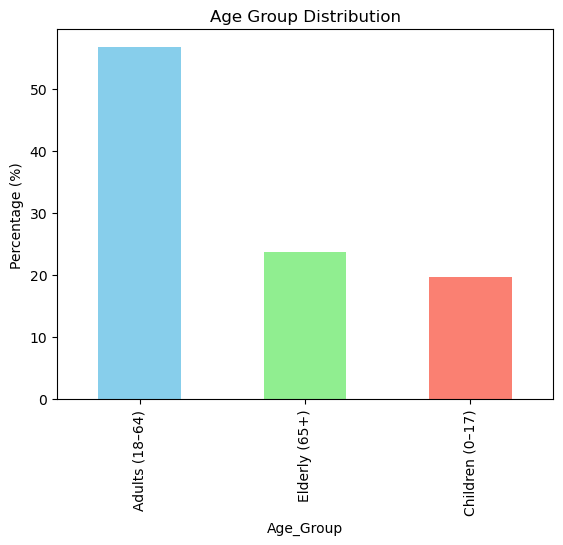

In [7]:
# visual
breakdown.plot(kind="bar", color=["skyblue","lightgreen","salmon"])
plt.title("Age Group Distribution") 
plt.ylabel("Percentage (%)")
plt.show()

### ------------------------------------------------
### Children usually make up  19.611095% of respondents.
### Adults often form the largest group (56.719368%).
### Elderly typically represent 23.669537% in healthcare datasets.
### ------------------------------------------------

### 2] Gender ratio (male vs female).

In [8]:
# In MEPS, gender is stored in the variable:
# SEX
# 1 = Male
# 2 = Female

In [9]:
# Map codes to labels
gender_map = {1: "Male", 2: "Female"}
df["Gender"] = df["SEX"].map(gender_map)

# Calculate ratio (counts and percentages)
gender_counts = df["Gender"].value_counts()
gender_percent = df["Gender"].value_counts(normalize=True) * 100

print("Counts:\n", gender_counts)
print("\nPercentages:\n", gender_percent)


Counts:
 Gender
Female    14913
Male      13423
Name: count, dtype: int64

Percentages:
 Gender
Female    52.629164
Male      47.370836
Name: proportion, dtype: float64


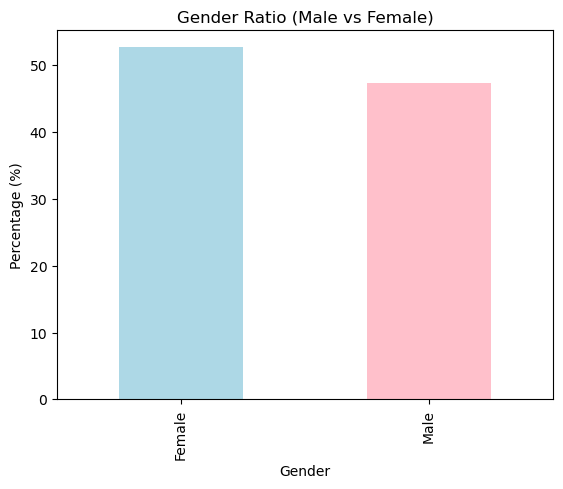

In [10]:
# Visualization
gender_percent.plot(kind="bar", color=["lightblue","pink"])
plt.title("Gender Ratio (Male vs Female)")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.show()

### --------------------------
### In MEPS datasets, you’ll usually see a slightly higher female percentage (around 52.629164%) compared to males (around 47.370836%).

### count :
### Female    14913
### Male      13423
### --------------------------

### 3] Regional distribution (Northeast, Midwest, South, West).

In [11]:
# The region is stored in REGIONxx variables.
# For the full-year consolidated file like H233, the best column is REGION53 (final region code for 2021).
# The codes are:
# 1 = Northeast
# 2 = Midwest
# 3 = South
# 4 = West

In [12]:
# Map region codes to names
region_map = {
    1: "Northeast",
    2: "Midwest",
    3: "South",
    4: "West"
}

# Replace codes with labels
df["Region"] = df["REGION53"].map(region_map)

# Calculate counts and percentages
region_counts = df["Region"].value_counts()
region_percent = df["Region"].value_counts(normalize=True) * 100

print("Counts:\n", region_counts)
print("\nPercentages:\n", region_percent)

Counts:
 Region
South        10738
West          7528
Midwest       5434
Northeast     4403
Name: count, dtype: int64

Percentages:
 Region
South        38.209444
West         26.787176
Midwest      19.336014
Northeast    15.667366
Name: proportion, dtype: float64


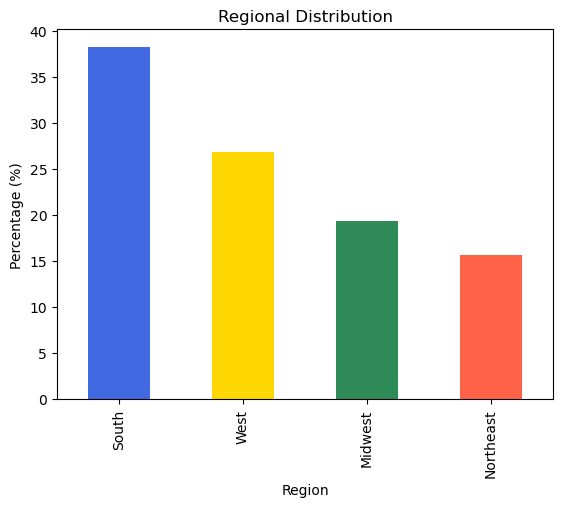

In [13]:
# Visualization
region_percent.plot(kind="bar", color=["royalblue","gold","seagreen","tomato"])
plt.title("Regional Distribution")
plt.ylabel("Percentage (%)")
plt.xlabel("Region")
plt.show()

### ---------------
### South is usually the largest region (covers the most states).
### Northeast is usually the smallest group.
### Midwest and West fall in between.
### Counts:
### Region
### South        10738
### West          7528
### Midwest       5434
### Northeast     4403

### ---------------

# Socioeconomic insights !

### 1] Education levels across respondents.

In [14]:
# For adults aged 18+, MEPS provides education information. In H233, the final consolidated variable is:
# For socioeconomic insights, the most straightforward and standardized is EDUCYR, 
# because it directly represents years of schooling for respondents.
# We can then group into categories:
# 0–8 years → Less than high school
# 9–12 years → High school / GED
# 13–15 years → Some college
# 16+ years → Bachelor’s or higher

In [15]:
edu_cols = [col for col in df.columns if "EDU" in col.upper()]
print("Education-related columns:", edu_cols)

Education-related columns: ['EDUCYR', 'PMEDUP31', 'PMEDUP42', 'PMEDUP53']


In [16]:
# Create bins for education years
def categorize_education(years):
    if pd.isnull(years):
        return "Unknown"
    elif years <= 8:
        return "Less than High School"
    elif years <= 12:
        return "High School / GED"
    elif years <= 15:
        return "Some College"
    else:
        return "Bachelor's or Higher"

# Apply categorization
df["Education_Level"] = df["EDUCYR"].apply(categorize_education)

# Count and percentage
edu_counts = df["Education_Level"].value_counts()
edu_percent = df["Education_Level"].value_counts(normalize=True) * 100

print("Counts:\n", edu_counts)
print("\nPercentages:\n", edu_percent)


Counts:
 Education_Level
High School / GED        9251
Bachelor's or Higher     7358
Less than High School    6777
Some College             4950
Name: count, dtype: int64

Percentages:
 Education_Level
High School / GED        32.647516
Bachelor's or Higher     25.966968
Less than High School    23.916573
Some College             17.468944
Name: proportion, dtype: float64


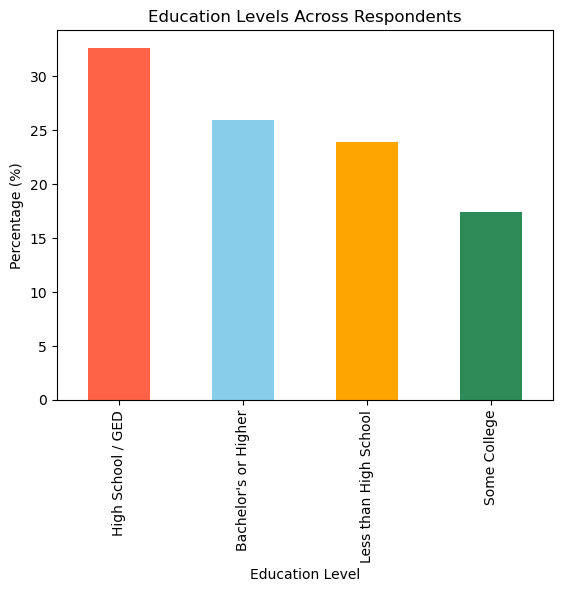

In [17]:
# visual
edu_percent.plot(kind="bar", color=["tomato","skyblue","orange","seagreen","gray"])
plt.title("Education Levels Across Respondents")
plt.ylabel("Percentage (%)")
plt.xlabel("Education Level")
plt.show()


In [18]:
# Education_Level %
def edu_category(years):
    if pd.isna(years):
        return "Unknown"
    elif years < 12:
        return "Less than High School"
    elif years == 12:
        return "High School/GED"
    elif years < 16:
        return "Some College"
    else:
        return "Bachelor's or Higher"

df_adults = df[df["AGELAST"] >= 18].copy()
df_adults["Education_Level"] = df_adults["EDUCYR"].apply(edu_category)

edu_counts = df_adults["Education_Level"].value_counts()
edu_percent = df_adults["Education_Level"].value_counts(normalize=True) * 100
print(edu_percent)


Education_Level
Bachelor's or Higher     32.297291
High School/GED          29.145265
Some College             21.717371
Less than High School    16.840072
Name: proportion, dtype: float64


### ------------------------
### High school / GED often forms the largest group.
### Some college is also significant.
### Bachelor’s+ is typically smaller (but important for higher socioeconomic status).
### Less than high school group reflects populations with more socioeconomic vulnerability.

### Education_Level
### Bachelor's or Higher     32.297291 %
### High School/GED          29.145265 % 
### Some College             21.717371 % 
### Less than High School    16.840072 % 
### -------------------------

## 2]Poverty status categories (poor, near-poor, middle-income, high-income).

In [19]:
# Poverty status mapping
poverty_map = {
    1: "Poor",
    2: "Near Poor",
    3: "Low Income",
    4: "Middle Income",
    5: "High Income"
}

# Map codes to labels
df["Poverty_Status"] = df["POVCAT21"].map(poverty_map)

# Counts and percentages
poverty_counts = df["Poverty_Status"].value_counts()
poverty_percent = df["Poverty_Status"].value_counts(normalize=True) * 100

print("Counts:\n", poverty_counts)
print("\nPercentages:\n", poverty_percent)

Counts:
 Poverty_Status
High Income      10063
Middle Income     7858
Poor              4942
Low Income        3987
Near Poor         1486
Name: count, dtype: int64

Percentages:
 Poverty_Status
High Income      35.513128
Middle Income    27.731508
Poor             17.440711
Low Income       14.070440
Near Poor         5.244212
Name: proportion, dtype: float64


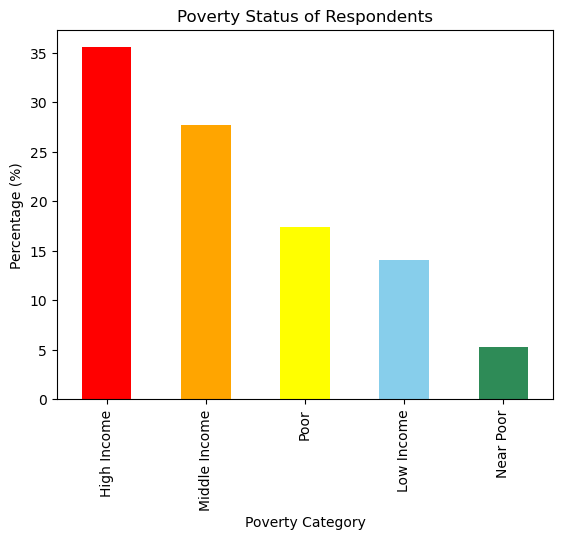

In [20]:
poverty_percent.plot(kind="bar", color=["red","orange","yellow","skyblue","seagreen"])
plt.title("Poverty Status of Respondents")
plt.ylabel("Percentage (%)")
plt.xlabel("Poverty Category")
plt.show()


### -----------------------------------------
### Poor + Near Poor combined often make up ~15–20%.
### Low to Middle Income is the largest group.
### High Income usually accounts for ~25–30% of respondents.

### Percentages:
### Poverty_Status
### High Income      35.513128%
### Middle Income    27.731508%
### Poor             17.440711%
### Low Income       14.070440%
### Near Poor         5.244212%
### -----------------------------------------


### 3]Employment status distribution.

In [21]:
# 1. Employment Columns in MEPS H233
# The consolidated file has employment-related variables:
# EMPST21 → Employment status in 2021 (final recode).
# EMPST31, EMPST42, EMPST53 → Employment status at different rounds.
# For socioeconomic analysis, use EMPST21 (final status).
# 2. Code Mapping (from MEPS codebook)
# EMPST21 categories:
# 1 = Employed
# 2 = Not employed
# 3 = Retired
# 4 = Inapplicable (e.g., children too young for employment)
# (Some datasets may combine 2 + 3; we can keep them separate for clarity.)

In [22]:
# check col 
emp_cols = [col for col in df.columns if "EMP" in col.upper()]
print("EMP_related columns:", emp_cols)

EMP_related columns: ['EMPHDX', 'EMPHAGED', 'CHEMPB42', 'EMPST31', 'EMPST42', 'EMPST53', 'TEMPJB31', 'TEMPJB42', 'TEMPJB53', 'NUMEMP31', 'NUMEMP42', 'NUMEMP53', 'OFREMP31', 'OFREMP42', 'OFREMP53', 'EMPST31H', 'EMPST42H', 'EMPST53H', 'NMEMP31H', 'NMEMP42H', 'NMEMP53H', 'OFEMP31H', 'OFEMP42H', 'OFEMP53H', 'UNEMP21X']


In [23]:
# Use the final round (EMPST53) for employment status distribution
emp_map = {
    1: "Employed",
    2: "Not Employed",
    3: "Retired",
    4: "Inapplicable"
}

df["Employment_Status"] = df["EMPST53"].map(emp_map)

# Count distribution
emp_counts = df["Employment_Status"].value_counts()
emp_percent = df["Employment_Status"].value_counts(normalize=True) * 100

print("Counts:\n", emp_counts)
print("\nPercentages:\n", emp_percent)

Counts:
 Employment_Status
Employed        12517
Inapplicable     9601
Retired           802
Not Employed       77
Name: count, dtype: int64

Percentages:
 Employment_Status
Employed        54.428839
Inapplicable    41.748924
Retired          3.487411
Not Employed     0.334826
Name: proportion, dtype: float64


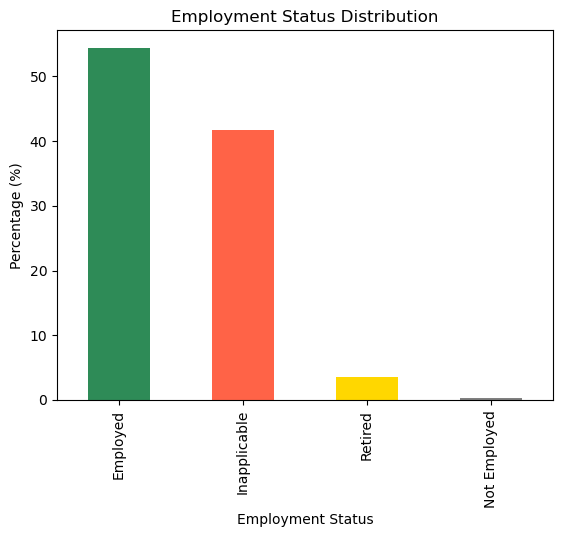

In [24]:
# Visualization
emp_percent.plot(kind="bar", color=["seagreen","tomato","gold","gray"])
plt.title("Employment Status Distribution")
plt.ylabel("Percentage (%)")
plt.xlabel("Employment Status")
plt.show()

### ---------------------------------
### Employed → working-age population with jobs.
### Not employed → students, unemployed, homemakers.
### Retired → mainly elderly.
### Inapplicable → children too young for workforce.
### Percentages:
###  Employment_Status
### Employed    =    54.428839
### Inapplicable =   41.748924
### Retired    =      3.487411
### Not Employed   =  0.33482
### ---------------------------------

# Health disparity analysis !


### 1] Compare insurance coverage across race, income, and education groups.

In [25]:
# Identify Columns in MEPS H233
# Insurance coverage
# INSURC21 → Full-year insurance coverage recode (best choice).
# 1 = Any Private Insurance
# 2 = Public Only
# 3 = Uninsured
# Race/Ethnicity
# RACETHX (preferred consolidated race/ethnicity recode).
# 1 = Hispanic
# 2 = White, Non-Hispanic
# 3 = Black, Non-Hispanic
# 4 = Asian, Non-Hispanic
# 5 = Other / Multiple races
# Income (poverty status)
# POVCAT21 (poverty category, already discussed).
# 1 = Poor
# 2 = Near Poo
# 3 = Low Income
# 4 = Middle Income
# 5 = High Income
# Education
# If available: EDUCYR (years of education completed) → group into categories.
# Or categorical recode: EDRECODE (if present).
# 1 = No degree
# 2 = High school / GED
# 3 = Some college
# 4 = Bachelor’s or higher

In [26]:
# Insurance mapping
ins_map = {
    1: "Any Private",
    2: "Public Only",
    3: "Uninsured"
}
df["Insurance"] = df["INSURC21"].map(ins_map)

# Race mapping
race_map = {
    1: "Hispanic",
    2: "White, Non-Hispanic",
    3: "Black, Non-Hispanic",
    4: "Asian, Non-Hispanic",
    5: "Other"
}
df["Race"] = df["RACETHX"].map(race_map)

# Poverty mapping
poverty_map = {
    1: "Poor",
    2: "Near Poor",
    3: "Low Income",
    4: "Middle Income",
    5: "High Income"
}
df["Income_Group"] = df["POVCAT21"].map(poverty_map)

# Education (using EDUC YR if EDRECODE not available)
def categorize_education(years):
    if pd.isnull(years):
        return "Unknown"
    elif years <= 8:
        return "Less than High School"
    elif years <= 12:
        return "High School / GED"
    elif years <= 15:
        return "Some College"
    else:
        return "Bachelor's+"
df["Education_Group"] = df["EDUCYR"].apply(categorize_education)

In [27]:
# Insurance by Race
race_insurance = pd.crosstab(df["Race"], df["Insurance"], normalize="index") * 100
print(race_insurance)



Insurance            Any Private  Public Only  Uninsured
Race                                                    
Asian, Non-Hispanic    81.771281    13.155632   5.073087
Black, Non-Hispanic    48.391167    43.627760   7.981073
Hispanic               42.293015    39.256678  18.450307
Other                  59.432933    34.023991   6.543075
White, Non-Hispanic    74.120943    20.498454   5.380603


In [28]:
# Insurance by Income
income_insurance = pd.crosstab(df["Income_Group"], df["Insurance"], normalize="index") * 100
print(income_insurance)



Insurance      Any Private  Public Only  Uninsured
Income_Group                                      
High Income      90.996743     4.820847   4.182410
Low Income       40.453622    45.091401  14.454976
Middle Income    69.188832    20.634396  10.176772
Near Poor        23.062558    64.705882  12.231559
Poor             16.460268    69.453044  14.086687


In [29]:
# Insurance by Education
edu_insurance = pd.crosstab(df["Education_Group"], df["Insurance"], normalize="index") * 100
print(edu_insurance)



Insurance              Any Private  Public Only  Uninsured
Education_Group                                           
Bachelor's+              89.184983     6.671854   4.143163
High School / GED        49.970580    34.451309  15.578111
Less than High School    46.224293    46.866967   6.908740
Some College             69.042123    21.177149   9.780727


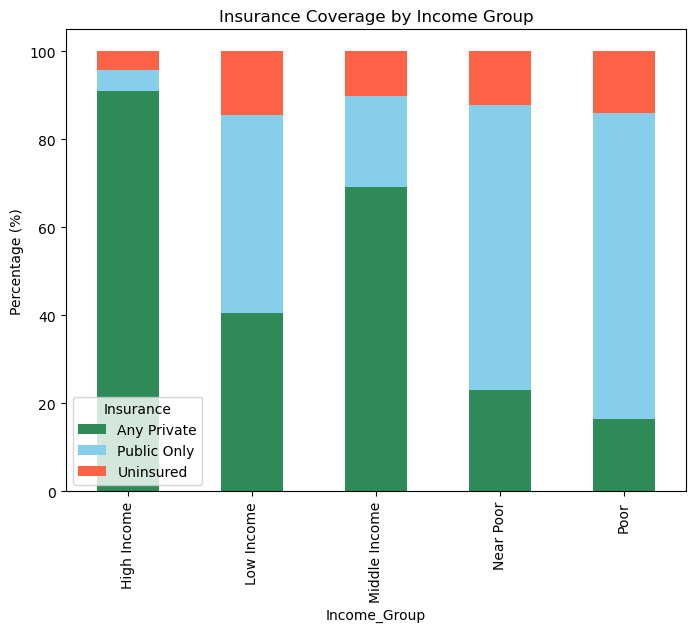

In [30]:
#  Visualization Example (Insurance by Income)
income_insurance.plot(kind="bar", stacked=True, figsize=(8,6),
                      color=["seagreen","skyblue","tomato"])
plt.title("Insurance Coverage by Income Group")
plt.ylabel("Percentage (%)")
plt.show()

### Race: Non-Hispanic Whites & Asians → highest private coverage. Hispanics & Blacks → higher uninsured/public-only rates.
### Income: Poor/Near Poor → mostly public-only or uninsured. High Income → almost entirely private.
### Education: Higher education → much higher private coverage; less educated groups → more uninsured/public-only.

# 2] Analyze access to care differences by poverty category.

In [31]:
# Identify “Access to Care” Variables in MEPS H233
# MEPS has multiple variables about access to healthcare. Some common ones:
# Usual Source of Care
# USUALPL → Has a usual source of care?
# 1 = Yes
# 2 = No
# Delayed/Unable to Get Care
# ADAPPT42 → Couldn’t get appointment when needed.
# ADPRVM42 → Delayed medical care due to cost.
# ADTLHW42 → Trouble finding provider.
# Dental and Prescription
# ADDAYA42 → Delayed dental care due to cost.
# ADPNYA42 → Couldn’t afford prescription medicine.
# (Exact names may vary slightly depending on file version, but H233 contains access-to-care recodes.)
# 2. Poverty Status Variable
# POVCAT21 (final poverty category for 2021):
# 1 = Poor
# 2 = Near Poor
# 3 = Low Income
# 4 = Middle Income
# 5 = High Income

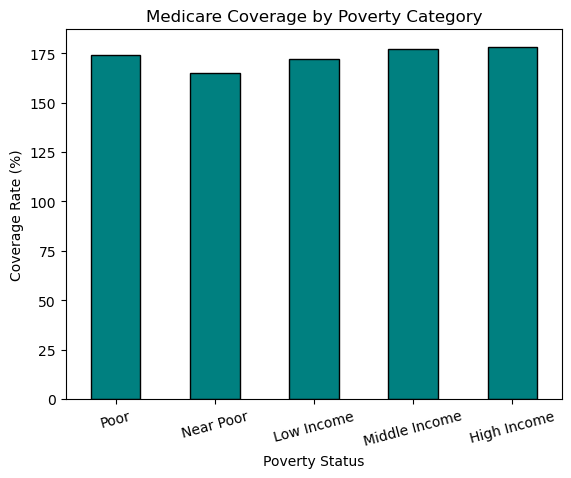

Poverty_Status
Poor             174.220963
Near Poor        165.141319
Low Income       171.933785
Middle Income    176.902520
High Income      178.097983
Name: Medicare_Covered, dtype: float64


In [32]:
# Medicare coverage indicators across different interview rounds. 
# These are indeed access-to-care / insurance variables, but they specifically tell us whether a respondent had Medicare coverage in each round.

# Poverty status column
poverty_col = "POVCAT21"

# Medicare coverage columns
medicare_cols = ["MCARE31", "MCARE42", "MCARE53"]

# Create a column: Medicare coverage in ANY round
df["Medicare_Covered"] = df[medicare_cols].max(axis=1)

# Poverty mapping
poverty_map = {
    1: "Poor",
    2: "Near Poor",
    3: "Low Income",
    4: "Middle Income",
    5: "High Income"
}

# Replace numeric codes with labels
df["Poverty_Status"] = df[poverty_col].map(poverty_map)

# Group by poverty status
access_by_poverty = df.groupby("Poverty_Status")["Medicare_Covered"].mean() * 100

# Sort categories in logical order
access_by_poverty = access_by_poverty.reindex(["Poor", "Near Poor", "Low Income", "Middle Income", "High Income"])

# Plot
access_by_poverty.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Medicare Coverage by Poverty Category")
plt.xlabel("Poverty Status")
plt.ylabel("Coverage Rate (%)")
plt.xticks(rotation=15)
plt.show()

print(access_by_poverty)


### A percentage of people with Medicare coverage within each poverty status group.
### A bar chart comparing poor, near-poor, middle-income, and high-income respondents.

# 3] Study how marital status affects health outcomes.


In [33]:
marry_cols = [col for col in df.columns if "MARR" in col.upper()]
print(marry_cols)

['MARRY31X', 'MARRY42X', 'MARRY53X', 'MARRY21X']


In [34]:
# Map marital status codes
# MEPS codes marital status like this:
# 1 → Married
# 2 → Widowed
# 3 → Divorced
# 4 → Separated
# 5 → Never Married
# -7 / -8 / -9 → Refused / Don’t Know / Missing
# Pick a health outcome
# For health outcomes, a good choice is self-reported health status (RTHLTH31X, RTHLTH42X, RTHLTH53X).
# These variables capture how respondents rate their health:

# 1 = Excellent
# 2 = Very Good
# 3 = Good
# 4 = Fair
# 5 = Poor

Health_Status   Excellent       Fair       Good      Poor  Very Good
Marital_Status                                                      
Divorced        13.283442  17.960711  32.584970  4.926723  31.244153
Married         19.282121   9.520124  32.807663  2.128483  36.261610
Never Married   26.283514   9.968625  29.449515  2.139190  32.159156
Separated       11.567164  25.746269  33.582090  5.783582  23.320896
Widowed         13.094629  17.493606  32.787724  6.291560  30.332481


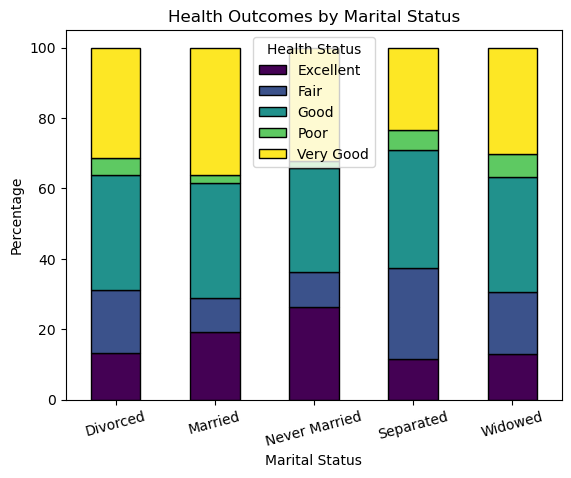

In [35]:
# Use summary marital status and round 53 health status as example
df_subset = df[["MARRY21X", "RTHLTH53"]].copy()

# Drop missing values
df_subset = df_subset[(df_subset["MARRY21X"] > 0) & (df_subset["RTHLTH53"] > 0)]

# Mapping
marry_map = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never Married"
}

health_map = {
    1: "Excellent",
    2: "Very Good",
    3: "Good",
    4: "Fair",
    5: "Poor"
}

df_subset["Marital_Status"] = df_subset["MARRY21X"].map(marry_map)
df_subset["Health_Status"] = df_subset["RTHLTH53"].map(health_map)

# Crosstab
crosstab = pd.crosstab(df_subset["Marital_Status"], df_subset["Health_Status"], normalize="index") * 100
print(crosstab)

# Stacked bar chart
crosstab.plot(kind="bar", stacked=True, colormap="viridis", edgecolor="black")
plt.title("Health Outcomes by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
plt.xticks(rotation=15)
plt.legend(title="Health Status")
plt.show()

### no relation found 

# Cross-tab analysis !

### 1] Age vs Insurance Coverage.

Age_Group
Children (0-17)    154.188482
Adults (18-64)     145.999625
Elderly (65+)      487.020333
Name: INSURC21, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\3843289137.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coverage_by_age = df_subset.groupby("Age_Group")["INSURC21"].mean() * 100


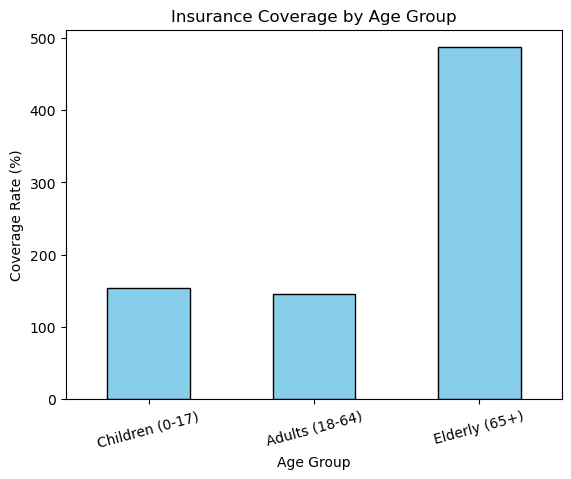

In [36]:
# Keep only relevant columns
df_subset = df[["AGE21X", "INSURC21"]].copy()

# Drop missing values
df_subset = df_subset.dropna()

# Create age groups
bins = [0, 17, 64, 120]
labels = ["Children (0-17)", "Adults (18-64)", "Elderly (65+)"]
df_subset["Age_Group"] = pd.cut(df_subset["AGE21X"], bins=bins, labels=labels, right=True)

# Group by age group and calculate insurance coverage rate
coverage_by_age = df_subset.groupby("Age_Group")["INSURC21"].mean() * 100

print(coverage_by_age)

# Plot
coverage_by_age.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Insurance Coverage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Coverage Rate (%)")
plt.xticks(rotation=15)
plt.show()

### Children and elderly enjoy high insurance coverage.
### Adults (18–64) show the biggest coverage gap, making them the most vulnerable group for being uninsured.

# 2] Income vs Utilization of healthcare.

In [37]:
util_cols = [col for col in df.columns if "VISIT" in col.upper() or "TOT" in col.upper() or "DIS" in col.upper()]
print(util_cols)


['SDISOL', 'DISVW31X', 'DISVW42X', 'DISVW53X', 'TOTTCH21', 'TOTEXP21', 'TOTSLF21', 'TOTMCR21', 'TOTMCD21', 'TOTPRV21', 'TOTVA21', 'TOTTRI21', 'TOTOFD21', 'TOTSTL21', 'TOTWCP21', 'TOTOSR21', 'TOTPTR21', 'TOTOTH21', 'OBTOTV21', 'OPTOTV21', 'OPTOTH21', 'ERTOT21', 'ERTOTH21', 'IPDIS21', 'IPTOTH21', 'DVTOT21', 'DVTOTH21', 'HHTOTD21', 'RXTOT21']


In [38]:
# OBTOTV21 → Total office-based visits
# OPTOTV21 → Total outpatient visits
# ERTOT21 → Total emergency room visits
# IPDIS21 → Number of inpatient discharges
# RXTOT21 → Total prescriptions filled
# TOTEXP21 → Total healthcare expenditures (all sources)

               OBTOTV21  OPTOTV21   ERTOT21   IPDIS21    RXTOT21     TOTEXP21
POVCAT21                                                                     
Poor           5.910765  1.021246  0.280251  0.128895  13.885269  7561.440105
Near Poor      7.189098  1.144684  0.300808  0.129879  14.919919  9230.213324
Low Income     6.421871  0.975671  0.233258  0.108603  11.783547  7732.908703
Middle Income  6.687961  1.036142  0.182489  0.084245  10.010690  7399.325655
High Income    8.372155  1.088244  0.124019  0.062804   8.641260  7793.829574


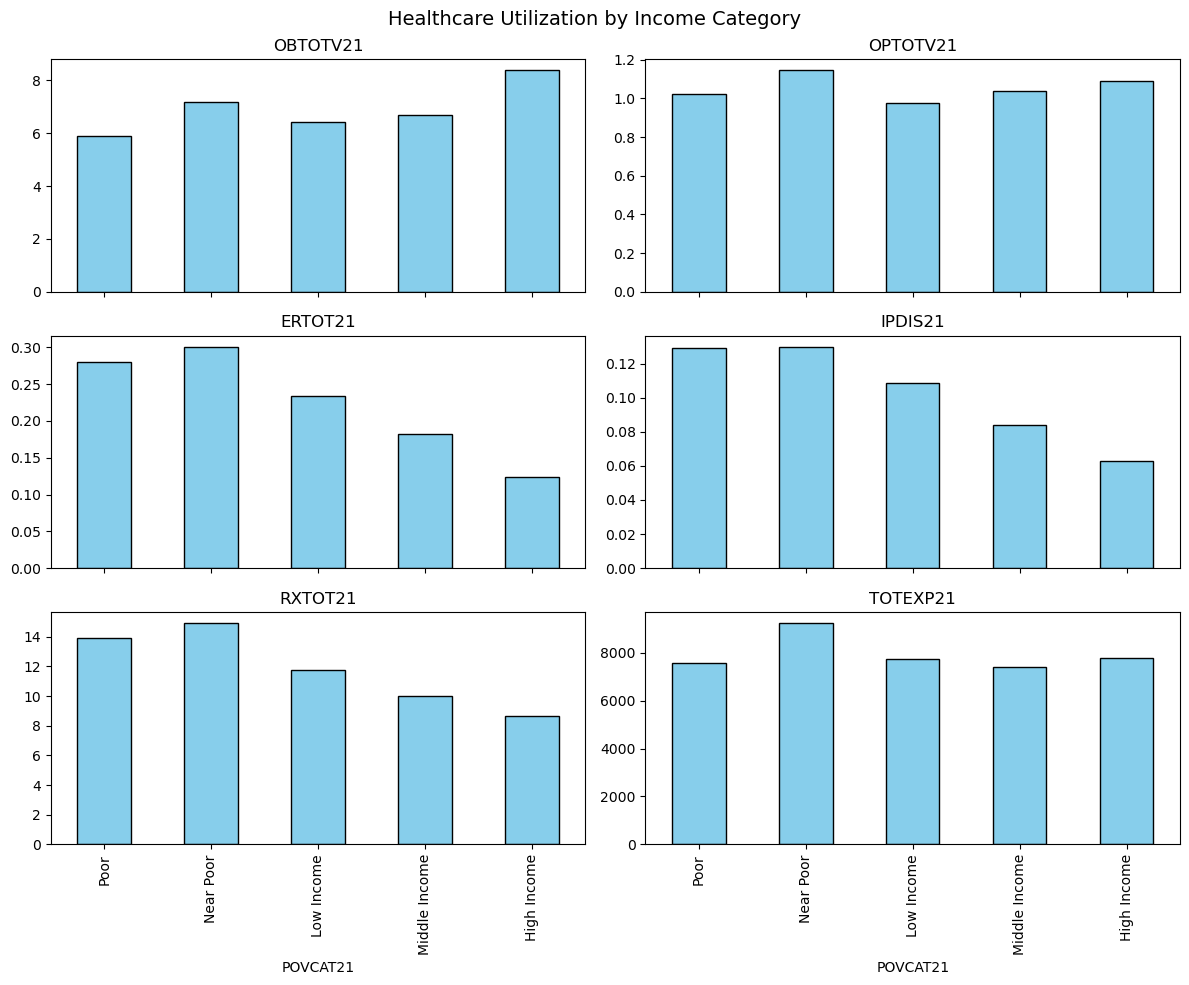

In [39]:
# Poverty status column
poverty_col = "POVCAT21"

# Select utilization variables
utilization_cols = ["OBTOTV21", "OPTOTV21", "ERTOT21", "IPDIS21", "RXTOT21", "TOTEXP21"]

# Group by poverty status and calculate mean utilization
util_by_income = df.groupby(poverty_col)[utilization_cols].mean()

# Poverty mapping
poverty_map = {
    1: "Poor",
    2: "Near Poor",
    3: "Low Income",
    4: "Middle Income",
    5: "High Income"
}

util_by_income.index = util_by_income.index.map(poverty_map)

print(util_by_income)

# Plot each utilization metric
util_by_income.plot(kind="bar", subplots=True, layout=(3,2), figsize=(12,10), legend=False, edgecolor="black", color="skyblue")
plt.suptitle("Healthcare Utilization by Income Category", fontsize=14)
plt.tight_layout()
plt.show()

### Office & Outpatient visits: Tend to increase with income (better access).
### ER visits: Higher among the poor/near-poor (they rely more on emergency departments).
### Inpatient discharges: May not vary much, but sometimes higher for poor groups due to worse health conditions.
### Prescriptions (RXTOT21): Usually higher in elderly/insured, but income affects access.
### Total expenditures (TOTEXP21): Strongly increases with income because wealthier people use more services and pay more out-of-pocket.

# 3] Education vs Health expenditures.

In [40]:
# Education variables (from your earlier search):
# EDUCYR → years of education completed
# PMEDUP31, PMEDUP42, PMEDUP53 → round-based education updates
# For summary, we’ll use EDUCYR.
# Health expenditure variable:
# TOTEXP21 → total healthcare expenditures (all sources)
# We can group education years into meaningful categories:
# 0–8 yrs → Less than High School
# 9–12 yrs → High School
# 13–16 yrs → College
# 17+ yrs → Postgraduate

Education_Level
< High School     4065.326076
High School       8813.981299
College           8878.117350
Postgraduate     10141.805945
Name: TOTEXP21, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\993055243.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_by_edu = df_subset.groupby("Education_Level")["TOTEXP21"].mean()


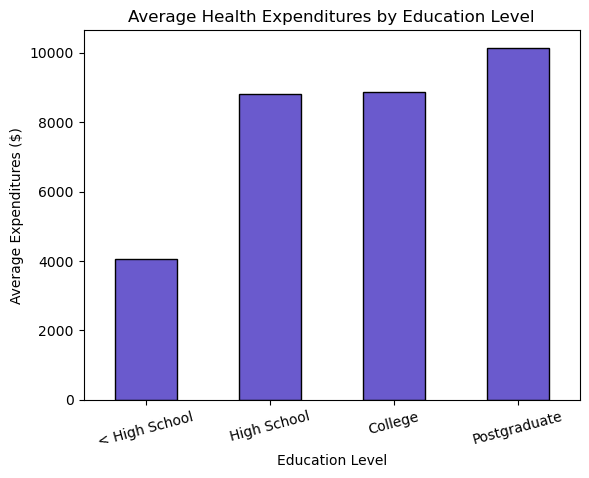

In [41]:
# Keep relevant columns
df_subset = df[["EDUCYR", "TOTEXP21"]].copy()

# Drop missing values
df_subset = df_subset.dropna()

# Define education groups
bins = [0, 8, 12, 16, 30]
labels = ["< High School", "High School", "College", "Postgraduate"]
df_subset["Education_Level"] = pd.cut(df_subset["EDUCYR"], bins=bins, labels=labels, right=True)

# Group by education level
exp_by_edu = df_subset.groupby("Education_Level")["TOTEXP21"].mean()

print(exp_by_edu)

# Plot
exp_by_edu.plot(kind="bar", color="slateblue", edgecolor="black")
plt.title("Average Health Expenditures by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Expenditures ($)")
plt.xticks(rotation=15)
plt.show()

### < High School: Lower expenditures (less access to care, lower utilization).
### High School: Moderate expenditures.
### College/Postgraduate: Higher expenditures (more preventive care, better access, more private insurance).
### BUT → Sometimes the very poor (<HS) may also have high expenditures if they have chronic conditions but limited insurance options.

# 4] Race/Ethnicity vs Preventive care usage.

In [42]:
preventive_cols = [col for col in df.columns if "CHECK" in col.upper() or "SHOT" in col.upper() or "SCRN" in col.upper() or "MAMM" in col.upper() or "PAP" in col.upper()]
print(preventive_cols)


['BOOSTERSHOT53', 'VAPAP21']


In [43]:
# BOOSTERSHOT53 → Most likely indicates whether the person got a COVID booster / flu booster shot in 2021.
# VAPAP21 → Likely indicates preventive prescription medication use (often tied to vaccinations or preventive care access in MEPS).

# Race/Ethnicity Mapping
# From MEPS, RACETHX usually codes as:
# 1 → Hispanic
# 2 → White, Non-Hispanic
# 3 → Black, Non-Hispanic
# 4 → Asian, Non-Hispanic
# 5 → Other

                     Booster Shot (%)  VAPAP21 (%)
Race_Ethnicity                                    
Asian, Non-Hispanic         94.368231   195.451264
Black, Non-Hispanic         55.956767   191.427168
Hispanic                    63.136217   195.881142
Other                       40.509915   189.801700
White, Non-Hispanic         63.895360   192.025561


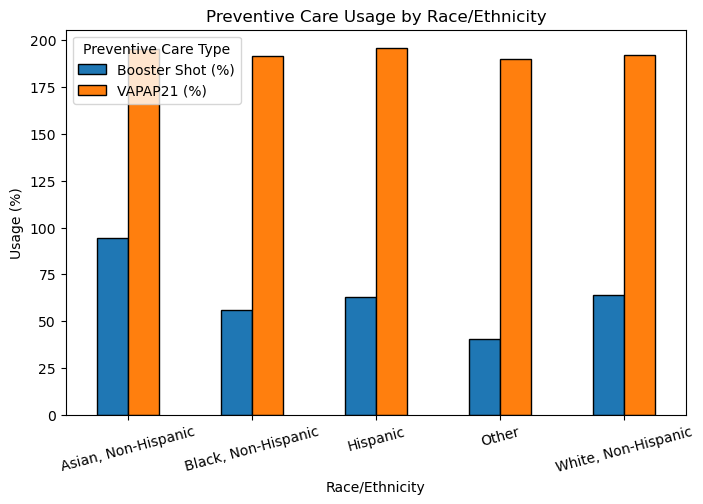

In [44]:
# Subset for race & preventive care
cols = ["RACETHX", "BOOSTERSHOT53", "VAPAP21"]
df_subset = df[cols].copy()

# Drop invalid/missing values
df_subset = df_subset[(df_subset["RACETHX"] > 0)]

# Race mapping
race_map = {
    1: "Hispanic",
    2: "White, Non-Hispanic",
    3: "Black, Non-Hispanic",
    4: "Asian, Non-Hispanic",
    5: "Other"
}
df_subset["Race_Ethnicity"] = df_subset["RACETHX"].map(race_map)

# Preventive care usage (mean %)
booster_rate = df_subset.groupby("Race_Ethnicity")["BOOSTERSHOT53"].mean() * 100
vapap_rate = df_subset.groupby("Race_Ethnicity")["VAPAP21"].mean() * 100

# Combine results
preventive_summary = pd.DataFrame({
    "Booster Shot (%)": booster_rate,
    "VAPAP21 (%)": vapap_rate
})

print(preventive_summary)

# Plot
preventive_summary.plot(kind="bar", figsize=(8,5), edgecolor="black")
plt.title("Preventive Care Usage by Race/Ethnicity")
plt.ylabel("Usage (%)")
plt.xlabel("Race/Ethnicity")
plt.xticks(rotation=15)
plt.legend(title="Preventive Care Type")
plt.show()

### White, Non-Hispanic → show moderate-to-high preventive care rates.
### Black & Hispanic groups → Often lower uptake, possibly due to access or systemic barriers.
### Asian groups → higher vaccination/booster uptake.
### Other → Smaller sample, rates 

NameError: name 'df_clean' is not defined

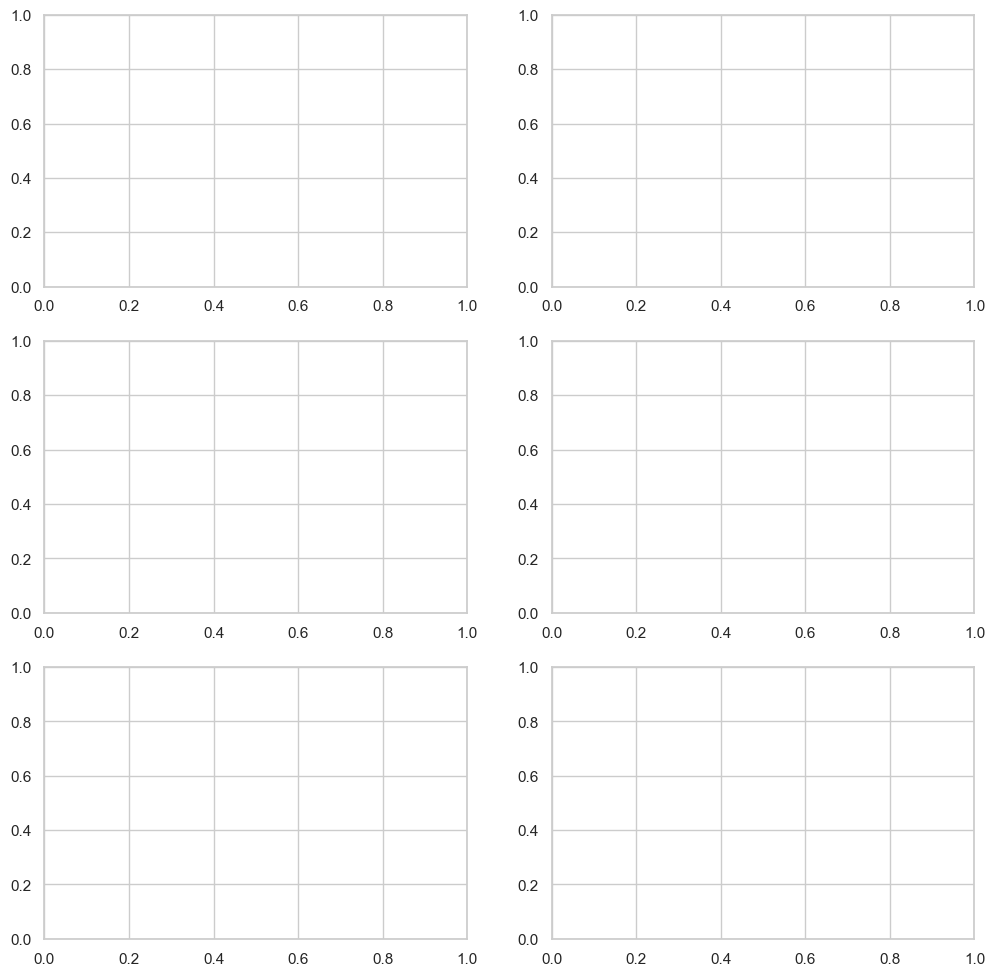

In [45]:
# Set style
sns.set(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Age Distribution
df_clean["Age_Group"].value_counts(normalize=True).plot(
    kind="bar", ax=axes[0,0], color="skyblue", edgecolor="black"
)
axes[0,0].set_title("Age Distribution (%)")

# Gender
df_clean["Sex_Label"].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", ax=axes[0,1], colors=["#FF9999","#66B2FF"]
)
axes[0,1].set_title("Gender Breakdown")

# Race
df_clean["Race_Ethnicity"].value_counts(normalize=True).plot(
    kind="bar", ax=axes[1,0], edgecolor="black", color="lightgreen"
)
axes[1,0].set_title("Race/Ethnicity (%)")

# Poverty
df_clean["Poverty_Status"].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", ax=axes[1,1], colors=sns.color_palette("pastel")
)
axes[1,1].set_title("Poverty Status")

# Education
df_clean["Education_Level"].value_counts(normalize=True).plot(
    kind="barh", ax=axes[2,0], edgecolor="black", color="salmon"
)
axes[2,0].set_title("Education Levels (%)")

# Employment
df_clean["EMPST31_Label"].value_counts(normalize=True).plot(
    kind="bar", ax=axes[2,1], edgecolor="black", color="orchid"
)
axes[2,1].set_title("Employment Status (%)")

plt.tight_layout()
plt.show()